<a href="https://colab.research.google.com/github/SahilBamb/YoutubeGradientDescentSim/blob/main/UPDATED_SahilBambulkarCS301MLEPoissonAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MLE - Poisson Assignment**
##Say you started a YouTube channel about a year ago. You’ve done quite well so far and have collected some data. You want to know the probability of at least x visitors to your channel given some time period. The obvious choice in distributions is the Poisson distribution which depends only on one parameter, λ, which is the average number of occurrences per interval. We want to estimate this parameter using Maximum Likelihood Estimation.
---

##1. (50 points) Simulate 100 visits to your youtube channel, assuming that they will a Poisson distribution with a mean of 10 visits per minute. Plot the arrival time vs visitor index.

#**What is a Poisson Distribution?**

A Poisson Distribution is a discrete distribution that describes the number of **events** occuring in a **fixed time interval or region**. 

It also requires only one parameter, λ.

Assumptions are the rate at which events occur is constant and the event in each subinterval is independent of other subintervals.

$$P(X = x) = \frac{e^{-λ}λ^x}{x!}$$

This formula provides the probability of occurrence of x events in unit time, given that the average occurrence rate is λ events per unit time. Knowing the mean visits per unit of time (or per minute) We can use this to model the probability of x visitors coming in a minute.

#**What is an Exponential Distribution?**

The poisson distribution defined a random variable as the number of events in some unit of time. There is another distribution that may be more relevant to solving our problem and that also utilizes the Poisson process. This is the exponential distribution. The random variable X equals the distance between successive events from a Poisson process with mean number of events λ.

The Probability Density Function or PDF is 
$f(x) = λe^{-λx}$

Now in order to find the arrival times of viewers you can use the cumulative distribution function. 

The Cumulative Distribution Function or CDF is:

$F(x) = 1 - e^{-λx}$

In this case, the CDF returns the probability that the interval, or distance, between successive events will be less than or equal to x. We will use the inverse CDF technique by finding the inverse CDF and feed it values between 0 and 1. 

$F(x)^{-1} = - \frac{ln(1-x)}{λ}$

This will give us the time between arrivals, and using a simple running sum we can calculate the arrival times of each visitor. We can call this running sum the current time as it will **effectively represent the current time of the latest visitor arrival**. First, our running sum/current time will start at 0 and after each visitor arrives we will record their value in a list as well as use it to update the running sum / current time.

#**Code Walkthrough**

###Calculations
First, we will declare variables with our lambda (lam), total visitors (visitors) and intialize our running sum / current time (currTime). 

Next we will initalize lists to store the visitor arrival times (ArrivalTimesList) and the visitors index (ArrivalTimesCount). If you know the length of the list, it is good practice to pre-intialize lists as appending to a list is a more expensive operation. 

Now we will run a loop through all the visitors using the variable i. 

Within the loop, we generate a random number between 0 and 1 using random.random() and store it in p. Then we use our inverseCDF function we previously discussed to calculate the time between arrivals. Then we use this to update our running sum or current time (currTime) to calculate the exact time of arrival. Finally we store this value into ArrivalTimesList[ i ] = currTime as the exact time of each arrival. 


###Visualization - Graphs and Tables

Once we finish this loop, using pyplot we can plot arrival time vs visitor index by plotting the two lists: ArrivalTimesList on the y-axis and ArrivalTimesCount on the x-axis. I also decided to provide a seperate graph to plot rounded visitor arrival times to the nearest minute. 

And finally I added a table to display the exact visitor time of each visitor. For ease of reading, I converted each time to seconds and minutes and padded them with zeros. This was done using floor divison (//) operator for minutes, modulus (%) operator for seconds and .zfill(2) to pad zeros to the strings. 





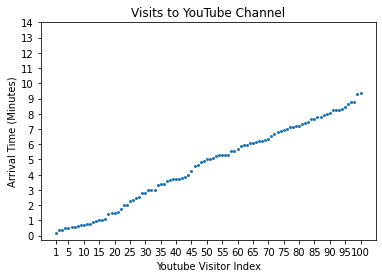

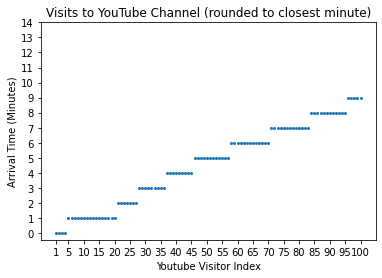

Visits to YouTube Channel
+---------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
| Visitor Index |   1   |   2   |   3   |   4   |   5   |   6   |   7   |   8   |   9   |   10  |   11  |   12  |   13  |   14  |   15  |   16  |   17  |   

In [ ]:
import random
import math
from matplotlib import pyplot as plt
from prettytable import PrettyTable 

#Initalize all variables and lists
lam = 10
visitors = 100
currTime = 0

ArrivalTimesCount = [_ for _ in range(1,visitors+1)]
ArrivalTimesList = [_ for _ in range(1,visitors+1)]

for i in range(visitors):
	#By default, random() returns value between 0 and 1
	p = random.random()

	#Plug it into the inverse of the CDF
	inverseCDF = -math.log(1.0 - p)/lam

	#Add the inter-arrival time to the current time to calculate the time of arrival
	#As well as update the current time for the next visitor
	currTime = currTime + inverseCDF

	#Record the exact time of arrival
	ArrivalTimesList[i] = currTime


#Draws the table of values for visitor index and arrival times
#Converts times to minutes:seconds and pads zeros
def drawTable(ArrivalTimesCount,ArrivalTimesList):
  print('Visits to YouTube Channel')
  for i in range(len(ArrivalTimesList)):
    visitTime = ArrivalTimesList[i]
    sec = visitTime*60
    min = round(sec//60)
    sec = round(sec%60)
    min = str(min).zfill(2)
    sec = str(sec).zfill(2)
    ArrivalTimesList[i] = f'{min}:{sec}'
  myTable = PrettyTable(['Visitor Index']+ArrivalTimesCount)
  myTable.add_row(['Arrival Time']+ArrivalTimesList)
  print(myTable)


#Graphs the Arrival Time versus Visitors (Actual)
plt.title('Visits to YouTube Channel')
plt.scatter(ArrivalTimesCount,ArrivalTimesList,s=4)
plt.xticks(ticks=[1] + [_ for _ in range(5,101,5)])
plt.yticks(ticks=[_ for _ in range(0,15,1)])
plt.xlabel("Youtube Visitor Index")
plt.ylabel("Arrival Time (Minutes)")
plt.show()

#Graphs the Arrival Time versus Visitors (Rounded)
plt.title('Visits to YouTube Channel (rounded to closest minute)')
plt.scatter(ArrivalTimesCount,[round(_) for _ in ArrivalTimesList],s=4)
plt.xticks(ticks=[1] + [_ for _ in range(5,101,5)])
plt.yticks(ticks=[_ for _ in range(0,15,1)])
plt.xlabel("Youtube Visitor Index")
plt.ylabel("Arrival Time (Minutes)")
plt.show()

drawTable(ArrivalTimesCount,ArrivalTimesList)

---
#2. (50 points) Assume that you are given the visitation data generated in Step 1, implement a Gradient Descent algorithm from scratch that will estimate the Poisson distribution according to the Maximum Likelihood criterion. Plot the estimated mean vs iterations to showcase convergence towards the true mean.

#**What is Maximum Likelihood Estimation MLE?**

After collecting data, you are able to deteremine its distribution. This is possible because a distribution is a function with inputs and outputs. The goal of Maximum Likelihood Estimation (MLE) is to estimate which input values produced the data. 

We do this by collecting a sample of our data. We will do the same exact simulation method as part 1, but slightly adjust the values we collect. In part 1, we only collected arrival times of each visitor. As well as storing arrival times, in part 2 we will also store the number of arrivals per minute. 

Before we get into the code, let's break down Maximum Likelihood Estimation or MLE:

#**Likelihood in MLE**

The likelihood is the probability of getting your sample, while this can be generalized. The exact PMF will differ for the exact type of distribution you're dealing with. For example here is what it would be for the Binomial Distribution:

$$P(X_{1} = sample 1,X_{2} = sample 2,X_{3}= sample 3,...) = $$

$$\prod_{i=1}^{n} pmf(X_i)$$


#**Maximum in MLE**

The maximum of any function can be found by differentiaton to give us our loss function. We can also differentiate the log of the function to make this easier. 

So all we need to do is differeniate the likelihood or log likelihood function and solve for the parameter. Note, finding the minimum of the negative log liklihood function is equivalent to finding the maximum of the log liklihood function. This is what we will do.

#**(Negative) Log Likelihood for Poisson Distribution**

$$L(λ;x_1,...,x_n) = \prod_{i=1}^{n} \frac{e^{-λ}λ^{x_i}}{x_i!}$$

Now once we take its negative log, differentiate it and solve for 0 we get... 

$$-LL(λ_k)$$ 
<center>The Negative Log Likelihood for Poisson Distribution</center>
$$-n + \frac{1}{λ}\sum_{i=1}^n x_i$$


#**Gradient Descent**


We can use the gradient descent to come up with an estimate for our parameter. If we were using Sum of Squared residuals instead, and trying to step closer and closer to an optimal parameter where the slope is flatter, we would have to take tons and tons of data points. These will be done through steps of getting closer and closer to a lower slope by taking steps without going over or under. 

The gradient in the Gradient Descent fixes this issue, by taking big steps when we are far away and smaller steps while we are closer. It achieves this with the understanding that the flatter the slope is, as in the closer the slope is to zero, the closer we are to our maximum. (Or in our case because we are using the negative log likelihood, the minimum).

When the partial derivative or slope is large, after being multiplied by the learning rate, it causes the gradient to make relatively big changes in the parameter. When the partial derivative or slope is smaller, it means smaller changes in the parameter.

We can decide to stop these iterations when the step size, or gradient multiplied by the learning rate, is very close to 0 or when the number of iterations exceeds a set number. We will follow the later of these, and stop after 1000 iteratons.

###Stochastic Gradient Descent

Because we have a relatively simple model with only one parameter and few terms we will be using Gradient Descent. But there can be cases with thousands of parameters and millions of samples. Trying to perform Gradient Descent on these scenarios would be prohibitively expensive. Basically, for big data Gradient Descent is very slow.

Thus, Stochastic Gradient Descent offers a solution. Instead of calculating the derivative of the loss function for every single datapoint, it randomly selects one sample data point. When it is more than one, it is called mini-batching. We will not be using Stochastic Gradient Descent here. 

###Solving Problem

So now we can estimate the parameter λ from the underlying poisson distribution. Let us use the Gradient Descent algorithm to estimate the Poisson distribution according to the Maximum Likelihood criterion. 


$$λ_{ML}$$

$$λ_{k+1} = λ_k - η∇_wLL(λ_k)$$

$η = 0.01$

$iterations = 1000$

$λ_0 = random.random(0,1)$

We can use a learning rate (η) of .01, the negative log liklihood function and an initial value of lambda of a random value between 0 and 1. Finally, we will do multiple iterations of this, 1000, to try and find the closest estimate of λ or true mean of the distribution. 


In this case, we know the true mean is 10 so we can compare our result to how close we get to that value. When plotted, it should be the case that it converges to a value of 10. 

#**Code Walkthrough**

###Same Simulation as Part 1 (but collecting slightly different data)

We will do the exact same steps as Part 1 to simulate 100 visitors but this time we will have an added list called ArrivalsPerMin that will store the number of arrivals per minute. 

It achieves this by checking if the rounded time of arrival or currTime is greater than the length of the list. For ArrivalsPerMin, with the ArrivalsPerMin[i] element representing visitors at the ith minute, the length of the list will represent the number of minutes so far. If it is greater, we will append to the end to add a new minute, if it is not greater then we simply iterate the last or ArrivalsPerMin[-1] element. 

###Gradient Descent Algorithm

For the set number of iterations, it will first store the value into a list (meanIterations) then calculate the gradient and use it to update the lambda (lam). Then this lambda will be stored in the list until all 1000 iterations are complete. 

###Visualization - Graphs and Tables

Once we finish this loop, using pyplot we can plot the iteration number (on the x-axis) versus the Mean λ that was calculated at that iteration. As noted by the graph, it converges to a value of very close to 10. The final lambda value is printed out. Also a table with every single lambda value along with its iteration is also printed out for reference. 










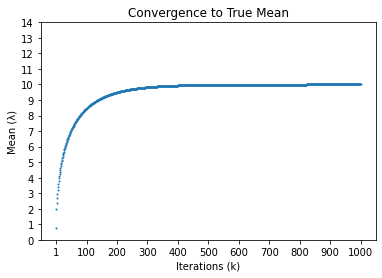

Final Lambda (λ) Estimate is 9.99984666539332



Lambda over Iterations (rounded to two decimal places)
+------------------+------+------+------+-----+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+-----+------+------+------+-----+------+------+-----+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+-----+------+------+------+------+------+------+------+------+------+------+------+------+-----+------+------+-----+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+-----+------+------+------+------+------+-----+------+------+------+------+------+-----+------+------+------+------+------+------+-----+------+------+------+------+-----

In [ ]:
import random
import math
from matplotlib import pyplot as plt
from prettytable import PrettyTable 

lam = 10
visitors = 100
currTime = 0

ArrivalTimesCount = [_ for _ in range(visitors)]
ArrivalTimesList = [_ for _ in range(visitors)]

#This is the only added variable compared to Part 1
#it will store the number of arrivals every minute 
ArrivalsPerMin = []

for i in range(visitors):
	p = random.random()
	inverseCDF = -math.log(1.0 - p)/lam
	currTime = currTime + inverseCDF

	#This will update the number of arrivals in ArrivalsPerMin every minute 
	#It does so by iterating the last index or appending to the list
	if round(currTime)>=len(ArrivalsPerMin):
		ArrivalsPerMin.append(1)
	else: 
		ArrivalsPerMin[-1]+=1

	ArrivalTimesList[i] = round(currTime)

#The first value of lambda is set to random and learning rate is .01
lam = random.random()
learningRate = .01

#Declares the number of iterations we will complete and creates a list to store them
numIts = 1001
meanIterations = [_ for _ in range(numIts)]

#This is the Gradient Descent Algorithm
for k in range(numIts):
	meanIterations[k] = lam
	gradient = len(ArrivalsPerMin) - ((1/lam)*sum(ArrivalsPerMin))
	lam = lam - (learningRate)*gradient

def drawTable(numItsList,meanIterations):
  print('Lambda over Iterations (rounded to two decimal places)')
  myTable = PrettyTable(['Iteration Number']+numItsList)
  meanIterations = [round(_,2) for _ in meanIterations]
  myTable.add_row(['Lambda (λ)']+meanIterations)
  print(myTable)

plt.title('Convergence to True Mean')
plt.scatter([_ for _ in range(numIts)],meanIterations,s=1)
plt.xticks(ticks=[1] + [_ for _ in range(100,numIts+1,100)])
plt.yticks(ticks=[_ for _ in range(0,15,1)])
plt.xlabel("Iterations (k)")
plt.ylabel("Mean (λ)")

plt.show()
print(f'Final Lambda (λ) Estimate is {lam}')
print('\n\n')
drawTable([_ for _ in range(numIts)],meanIterations)
